### Standford Cars Vehicle Recognition - Exploratory Data Analysis

### CODE ONLY, For a detailed report, please refer to the Final Report

#### by Sean Sungil Kim

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# importing necessary modules
import numpy as np
import pandas as pd
import seaborn as sns
import cv2
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

# custom python scripts
import SC_sungil             # preprocessing
#import Models_sungil         # exploratory analysis and model fitting/comparisons

In [3]:
# loading the images, classes and labels
#train_sc_data, train_bounding_boxes, train_data_class, data_labels = \
#    SC_sungil.load_images('cars_train/cars_train/cars_train/', 'devkit/cars_train_annos.mat',\
#                          None, 'devkit/cars_meta.mat')
#test_sc_data, test_bounding_boxes, test_data_class = \
#    SC_sungil.load_images('cars_test/', None, 'devkit/cars_test_annos_withlabels', None)

# cropping the original images to detect vehicles
#train_detected_sc = SC_sungil.vehicle_detect(train_sc_data, train_bounding_boxes)
#test_detected_sc = SC_sungil.vehicle_detect(test_sc_data, test_bounding_boxes)

# saving the vehicle detected images
#SC_sungil.save_as_jpg(train_detected_sc, test_detected_sc)

In [4]:
# for convenience, vehicle detected images are already saved
# loading the pre-saved vehicle detected images, classes and labels
train_detected_sc, train_data_class, data_labels = SC_sungil.load_images('saved_images/training/',\
                                            'devkit/cars_train_annos.mat', None, 'devkit/cars_meta.mat')
test_detected_sc, test_data_class = SC_sungil.load_images('saved_images/testing/', None,\
                                                          'devkit/cars_test_annos_withlabels', None)

Training image loading runtime: 209.2626953125
Testing image loading runtime: 196.21597981452942


In [5]:
# obtaining lists of make, model, type, and year extracted from the data_labels
old_make_List, old_model_List, old_type_List, old_year_List = SC_sungil.split_labels(data_labels)

# returning/saving the class and labels in csv format for my group members
# both for the training and testing set
old_train_df = SC_sungil.csv_convrt(train_data_class, old_make_List, old_model_List, \
                                old_type_List, old_year_List, 'old_train_class_data.csv')
old_test_df = SC_sungil.csv_convrt(test_data_class, old_make_List, old_model_List, \
                               old_type_List, old_year_List, 'old_test_class_data.csv')

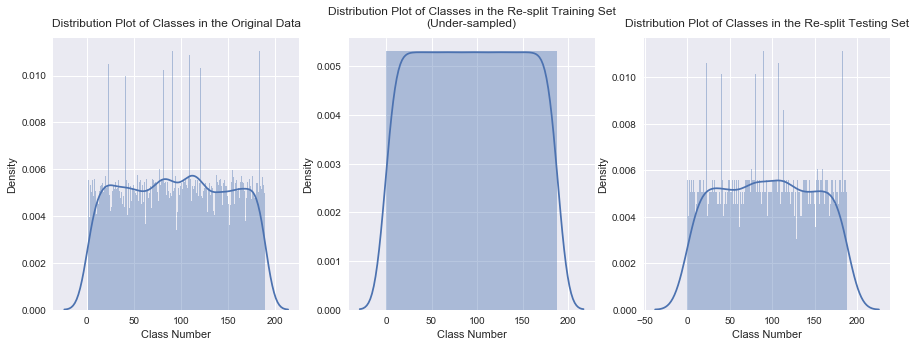

Total of 7938 images in the training data
Total of 1985 images in the testing data
80.00 percent training set, 20.00 percent testing set


In [6]:
# combining the training and testing dataset
all_data = np.concatenate((train_detected_sc, test_detected_sc), axis = 0)
all_class = np.concatenate((train_data_class, test_data_class), axis = 0)

# removing year and mergining classes
wo_yr_data_labels, wo_yr_all_class = SC_sungil.rmv_year(data_labels, all_class)
wo_yr_all_class = wo_yr_all_class - 1

# number of classes
wo_yr_num_classes = len(wo_yr_data_labels)

# 80% train 20% test split
# test_size was set to 0.1226, to maintain the validation set size to 20% post under-sampling
wo_yr_x_train, wo_yr_x_test, wo_yr_y_train, wo_yr_y_test = train_test_split(all_data, \
                            wo_yr_all_class, stratify = wo_yr_all_class, test_size = 0.1226)

# random under-sampling
wo_yr_und_x_train, wo_yr_und_y_train = SC_sungil.under_sample(wo_yr_x_train, wo_yr_y_train)

# post split class distribution
fig = plt.figure(figsize = (15, 5))
plt.subplot(1, 3, 1)
sns.distplot(all_class, bins = wo_yr_num_classes)
plt.title('Distribution Plot of Classes in the Original Data', y = 1.02)
plt.xlabel('Class Number'), plt.ylabel('Density')
plt.subplot(1, 3, 2)
sns.distplot(wo_yr_und_y_train, bins = wo_yr_num_classes)
plt.title('Distribution Plot of Classes in the Re-split Training Set\n(Under-sampled)', y = 1.02)
plt.xlabel('Class Number'), plt.ylabel('Density')
plt.subplot(1, 3, 3)
sns.distplot(wo_yr_y_test, bins = wo_yr_num_classes)
plt.title('Distribution Plot of Classes in the Re-split Testing Set', y = 1.02)
plt.xlabel('Class Number'), plt.ylabel('Density')
plt.show()

tot_len = len(wo_yr_und_x_train) + len(wo_yr_x_test)
print('Total of %i images in the training data' % len(wo_yr_und_x_train))
print('Total of %i images in the testing data' % len(wo_yr_x_test))
print('%0.2f percent training set, %0.2f percent testing set' \
      % (len(wo_yr_und_x_train)/tot_len*100, len(wo_yr_x_test)/tot_len*100))

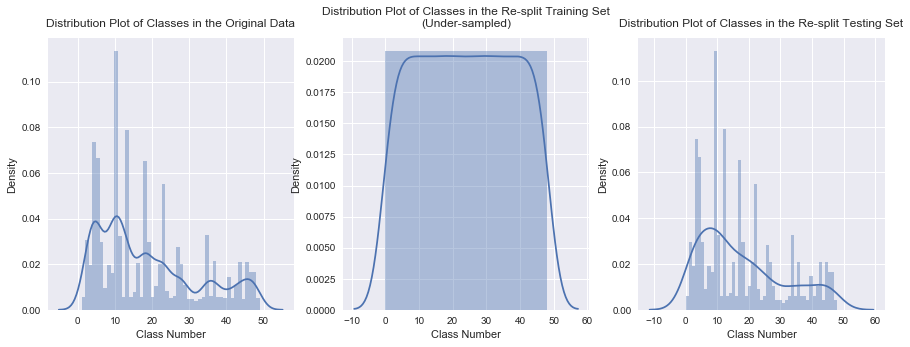

Total of 2744 images in the training data
Total of 686 images in the testing data
80.00 percent training set, 20.00 percent testing set


In [7]:
# combining the training and testing dataset
all_data = np.concatenate((train_detected_sc, test_detected_sc), axis = 0)
all_class = np.concatenate((train_data_class, test_data_class), axis = 0)

# removing year and merging classes
wo_mdyr_data_labels, wo_mdyr_all_class = SC_sungil.rmv_model_year(data_labels, all_class)
wo_mdyr_all_class = wo_mdyr_all_class - 1

# number of classes
wo_mdyr_num_classes = len(wo_mdyr_data_labels)

# 80% train 20% test split
# test_size was set to 0.04235, to maintain the validation set size to 20% post under-sampling
wo_mdyr_x_train, wo_mdyr_x_test, wo_mdyr_y_train, wo_mdyr_y_test = train_test_split(all_data, \
                            wo_mdyr_all_class, stratify = wo_mdyr_all_class, test_size = 0.04235)

# random under-sampling
wo_mdyr_und_x_train, wo_mdyr_und_y_train = SC_sungil.under_sample(wo_mdyr_x_train, wo_mdyr_y_train)

# post split class distribution
fig = plt.figure(figsize = (15, 5))
plt.subplot(1, 3, 1)
sns.distplot(all_class, bins = wo_mdyr_num_classes)
plt.title('Distribution Plot of Classes in the Original Data', y = 1.02)
plt.xlabel('Class Number'), plt.ylabel('Density')
plt.subplot(1, 3, 2)
sns.distplot(wo_mdyr_und_y_train, bins = wo_mdyr_num_classes)
plt.title('Distribution Plot of Classes in the Re-split Training Set\n(Under-sampled)', y = 1.02)
plt.xlabel('Class Number'), plt.ylabel('Density')
plt.subplot(1, 3, 3)
sns.distplot(wo_mdyr_y_test, bins = wo_mdyr_num_classes)
plt.title('Distribution Plot of Classes in the Re-split Testing Set', y = 1.02)
plt.xlabel('Class Number'), plt.ylabel('Density')
plt.show()

tot_len = len(wo_mdyr_und_x_train) + len(wo_mdyr_x_test)
print('Total of %i images in the training data' % len(wo_mdyr_und_x_train))
print('Total of %i images in the testing data' % len(wo_mdyr_x_test))
print('%0.2f percent training set, %0.2f percent testing set' \
      % (len(wo_mdyr_und_x_train)/tot_len*100, len(wo_mdyr_x_test)/tot_len*100))

In [8]:
# obtaining the average image size, list of width sizes and list of height sizes
train_avg_size, train_x_size_List, train_y_size_List, train_aspect_ratio_List = SC_sungil.avg_size(wo_yr_und_x_train)
test_avg_size, test_x_size_List, test_y_size_List, test_aspect_ratio_List = SC_sungil.avg_size(wo_yr_x_test)
print('The average image size in the Re-split Stanford Cars Training Set is', train_avg_size)
print('The average image size in the Re-split Stanford Cars Testing Set is', test_avg_size)

The average image size in the Re-split Stanford Cars Training Set is (571, 306)
The average image size in the Re-split Stanford Cars Testing Set is (576, 312)


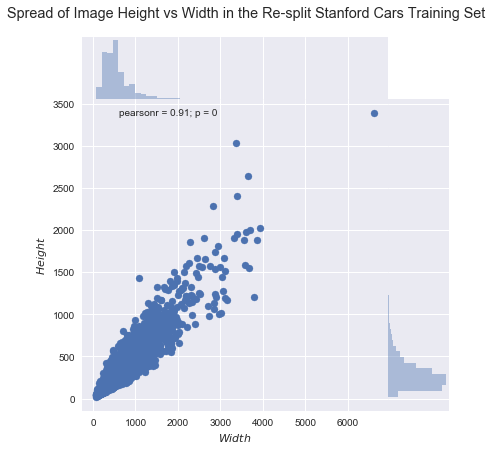

In [9]:
# converting into pandas series
train_width = pd.Series(np.array(train_x_size_List), name = "$Width$")
train_height = pd.Series(np.array(train_y_size_List), name = "$Height$")

# jointplot, combining a scatterplot of width vs. height 
# and distribution plots of width and height
g = sns.jointplot(train_width, train_height, kind = "scatter", space = 0)
g.fig.suptitle('Spread of Image Height vs Width in the Re-split Stanford Cars Training Set', y = 1.04)
plt.show()

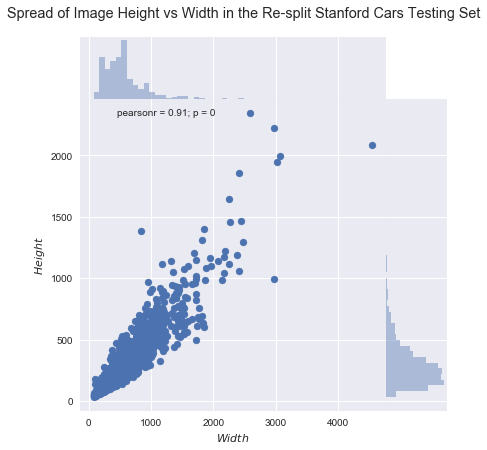

In [10]:
# converting into pandas series
test_width = pd.Series(np.array(test_x_size_List), name = "$Width$")
test_height = pd.Series(np.array(test_y_size_List), name = "$Height$")

# jointplot, combining a scatterplot of width vs. height 
# and distribution plots of width and height
g = sns.jointplot(test_width, test_height, kind = "scatter", space = 0)
g.fig.suptitle('Spread of Image Height vs Width in the Re-split Stanford Cars Testing Set', y = 1.04)
plt.show()

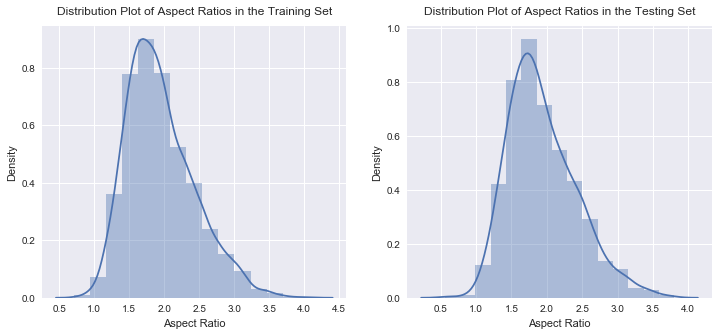

In [11]:
# aspect ratio distribution plot
fig = plt.figure(figsize = (12, 5))
plt.subplot(1, 2, 1), sns.distplot(train_aspect_ratio_List, bins = 15)
plt.title('Distribution Plot of Aspect Ratios in the Training Set', y = 1.02)
plt.xlabel('Aspect Ratio'), plt.ylabel('Density')
plt.subplot(1, 2, 2), sns.distplot(test_aspect_ratio_List, bins = 15)
plt.title('Distribution Plot of Aspect Ratios in the Testing Set', y = 1.02)
plt.xlabel('Aspect Ratio'), plt.ylabel('Density')
plt.show()

For the side-to-side graphs below, the sorted (Make, Model, Type, Year, and Type grouped by Year) order of the training set plot was applied on the order of the testing set plot.

In [12]:
# obtaining lists of make, model, type, and year extracted from the data_labels
new_make_List, new_model_List, new_type_List = SC_sungil.split_labels(wo_yr_data_labels, wo_yr = 1)

# returning/saving the class and labels in csv format for my group members
# both for the training and testing set
new_train_df = SC_sungil.csv_convrt(wo_yr_und_y_train, new_make_List, new_model_List, new_type_List,\
                                    None, 'new_train_class_data.csv', wo_yr = 1)
new_test_df = SC_sungil.csv_convrt(wo_yr_y_test, new_make_List, new_model_List, new_type_List, None,\
                                   'new_test_class_data.csv', wo_yr = 1)

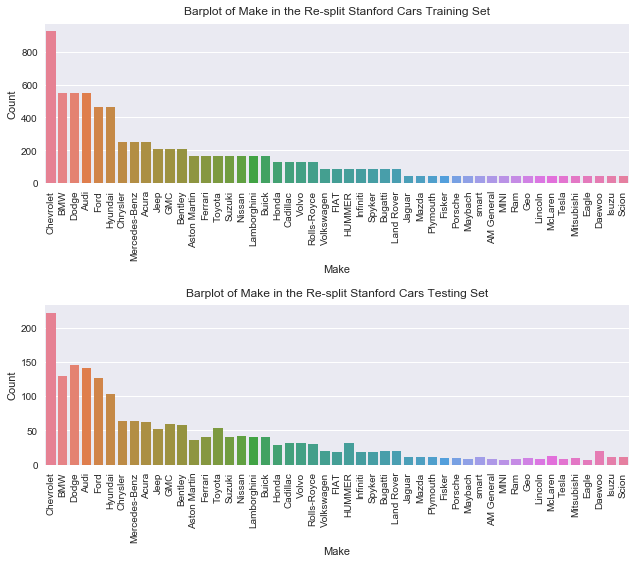

In [13]:
# Countplot of Make in the Stanford Cars Training and Testing Set
fig = plt.figure(figsize = (9, 8))
plt.subplot(2, 1, 1)
sns.countplot('Make', data = new_train_df, order = new_train_df['Make'].value_counts().index,\
              palette = "husl")
plt.title('Barplot of Make in the Re-split Stanford Cars Training Set', y = 1.02)
plt.ylabel('Count'), plt.xticks(rotation = 90)
plt.subplot(2, 1, 2)
sns.countplot('Make', data = new_test_df, order = new_train_df['Make'].value_counts().index,\
              palette = "husl")
plt.title('Barplot of Make in the Re-split Stanford Cars Testing Set', y = 1.02)
plt.ylabel('Count'), plt.xticks(rotation = 90), plt.tight_layout()
plt.show()

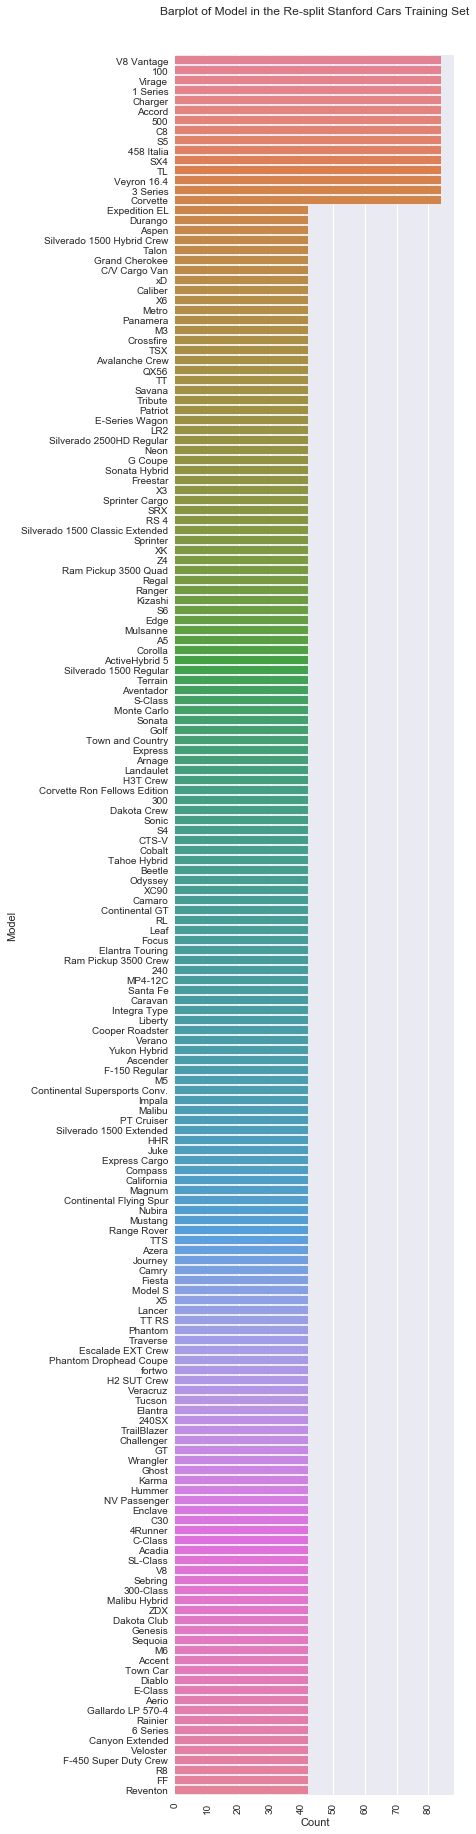

In [14]:
# Countplot of Model in the Stanford Cars Training Set
plt.figure(figsize = (5, 32))
sns.countplot(y = 'Model', data = new_train_df, order = new_train_df['Model'].value_counts().index,\
              palette = "husl")
plt.title('Barplot of Model in the Re-split Stanford Cars Training Set', y = 1.02)
plt.xlabel('Count'), plt.xticks(rotation = 90)
plt.show()

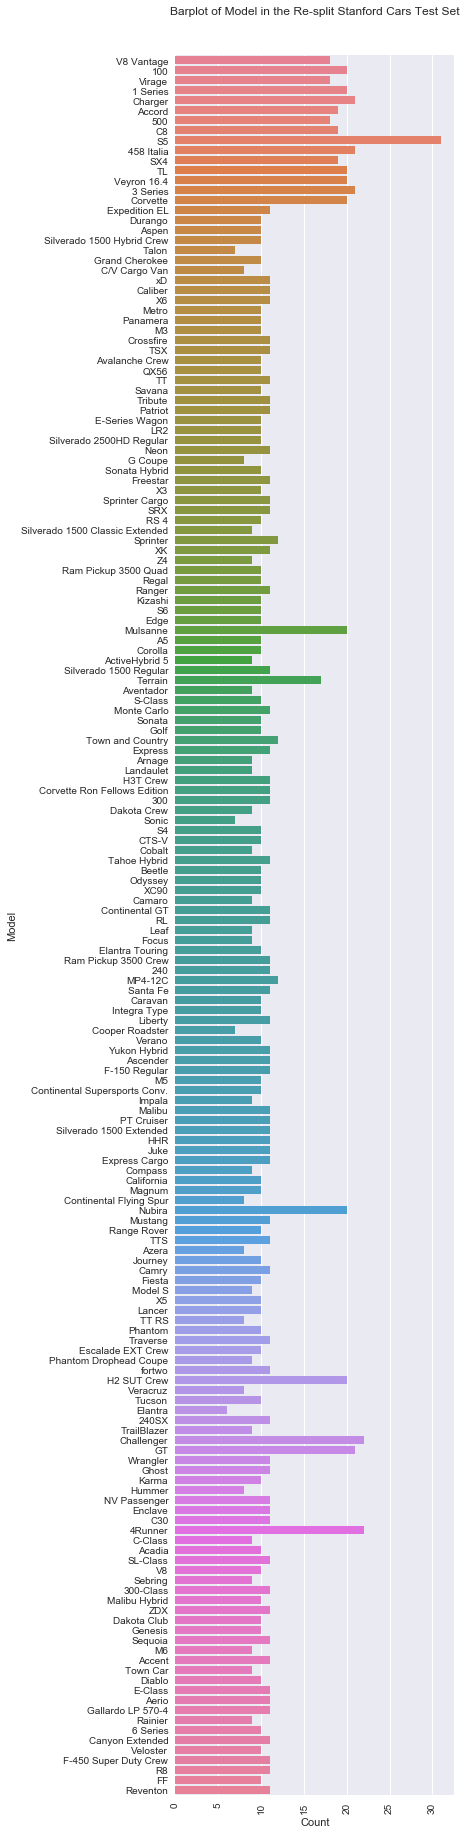

In [15]:
# Countplot of Model in the Stanford Cars Testing Set
plt.figure(figsize = (5, 32))
sns.countplot(y = 'Model', data = new_test_df, order = new_train_df['Model'].value_counts().index,\
              palette = "husl")
plt.title('Barplot of Model in the Re-split Stanford Cars Test Set', y = 1.02)
plt.xlabel('Count'), plt.xticks(rotation = 90)
plt.show()

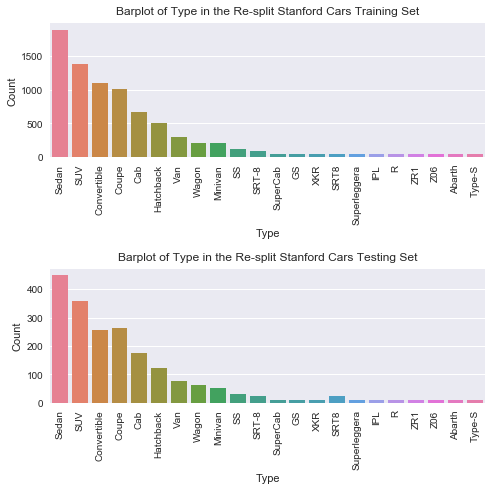

In [16]:
# Countplot of Type in the Stanford Cars Training and Testing Set
plt.figure(figsize = (7, 7))
plt.subplot(2, 1, 1)
sns.countplot('Type', data = new_train_df, order = new_train_df['Type'].value_counts().index,\
              palette = "husl")
plt.title('Barplot of Type in the Re-split Stanford Cars Training Set', y = 1.02)
plt.ylabel('Count'), plt.xticks(rotation = 90)
plt.subplot(2, 1, 2)
sns.countplot('Type', data = new_test_df, order = new_train_df['Type'].value_counts().index,\
              palette = "husl")
plt.title('Barplot of Type in the Re-split Stanford Cars Testing Set', y = 1.02)
plt.ylabel('Count'), plt.xticks(rotation = 90), plt.tight_layout()
plt.show()

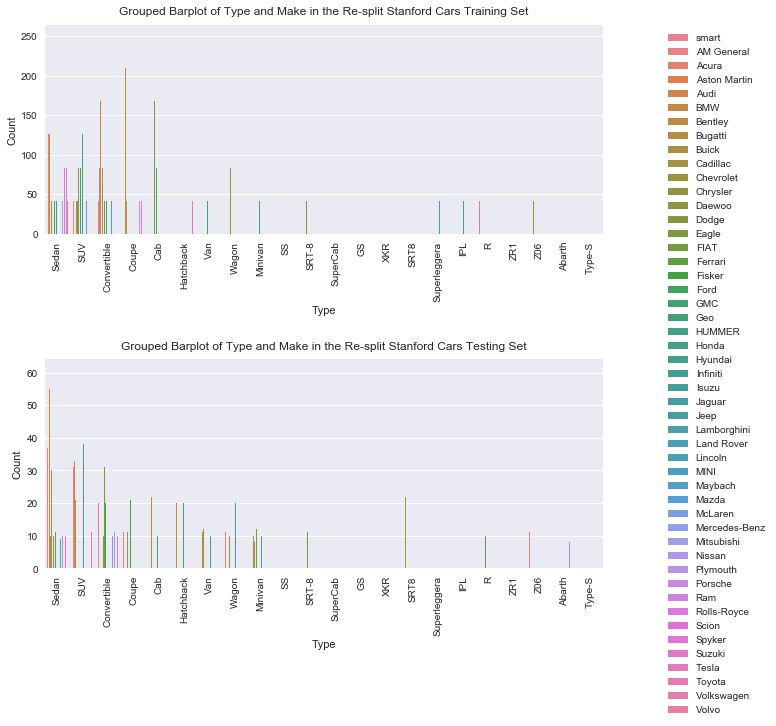

In [17]:
# Countplot of Type grouped by Year in the Stanford Cars Training and Testing Set
f, (ax1, ax2) = plt.subplots(2, figsize=(10, 10))
sns.countplot('Type', hue = 'Make', order = new_train_df['Type'].value_counts().index,\
              data = new_train_df, palette = "husl", ax = ax1)
ax1.set_title('Grouped Barplot of Type and Make in the Re-split Stanford Cars Training Set', y = 1.02)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation = 90), ax1.set_ylabel('Count')
ax1.legend(bbox_to_anchor=(1.1, 1), loc = 2)
sns.countplot('Type', hue = 'Make', order = new_train_df['Type'].value_counts().index,\
              data = new_test_df, palette = "husl", ax = ax2)
ax2.set_title('Grouped Barplot of Type and Make in the Re-split Stanford Cars Testing Set', y = 1.02)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation = 90), ax2.set_ylabel('Count')
ax2.get_legend().remove(), plt.subplots_adjust(hspace = 0.6)
plt.show()

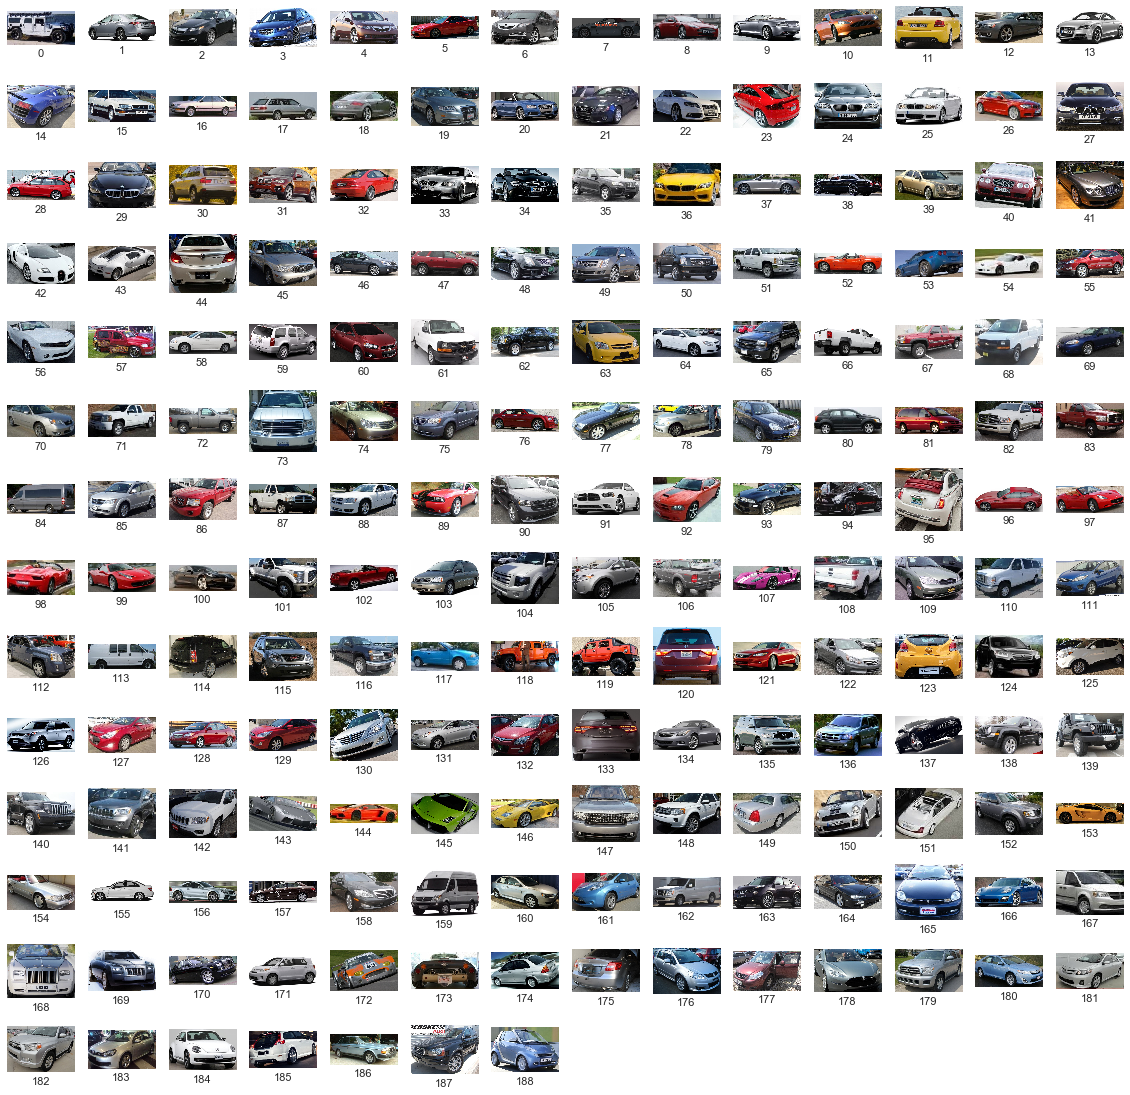

In [18]:
# one image example from each class
plt.figure(figsize = (20, 20))
for i in range(wo_yr_num_classes):
    plt.subplot(14, 14, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(cv2.cvtColor(wo_yr_und_x_train[wo_yr_und_y_train.tolist().index(i)], cv2.COLOR_BGR2RGB))
    plt.xlabel(i)
plt.show()

In [19]:
# edge detection and histogram of gradients
edge_img = SC_sungil.canny_edge_convrt(wo_yr_und_x_train[0])
hog_img = SC_sungil.hog_compute(wo_yr_und_x_train[0])

HOG feature computation runtime: 3.892561435699463


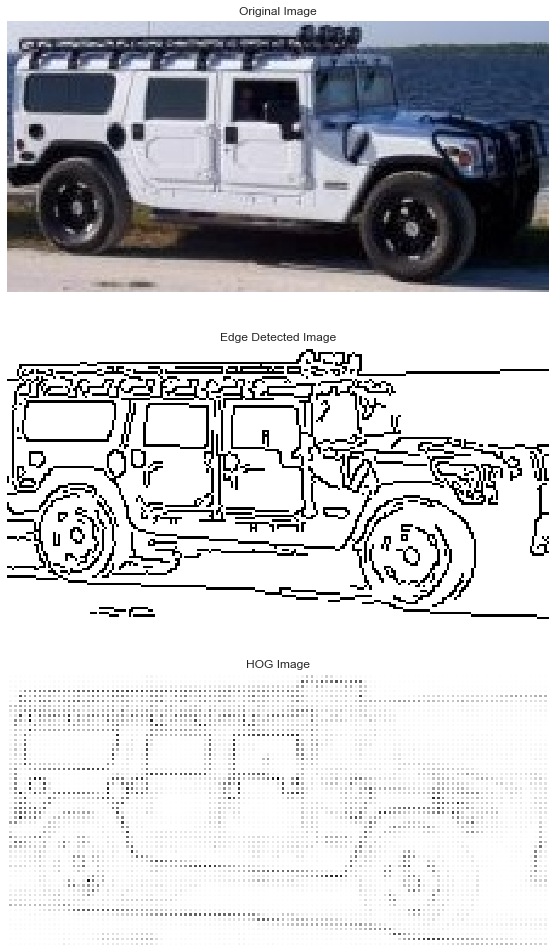

In [20]:
# comparison of original vehicle detected vs. edge detected vs. hog
plt.figure(figsize = (15, 17))
plt.subplot(3, 1, 1), plt.xticks([]), plt.yticks([]), plt.grid(False)
plt.imshow(cv2.cvtColor(wo_yr_und_x_train[0], cv2.COLOR_BGR2RGB)), plt.title('Original Image')
plt.subplot(3, 1, 2), plt.xticks([]), plt.yticks([]), plt.grid(False)
plt.imshow(edge_img), plt.title('Edge Detected Image')
plt.subplot(3, 1, 3), plt.xticks([]), plt.yticks([]), plt.grid(False)
plt.imshow(hog_img), plt.title('HOG Image')
plt.show()

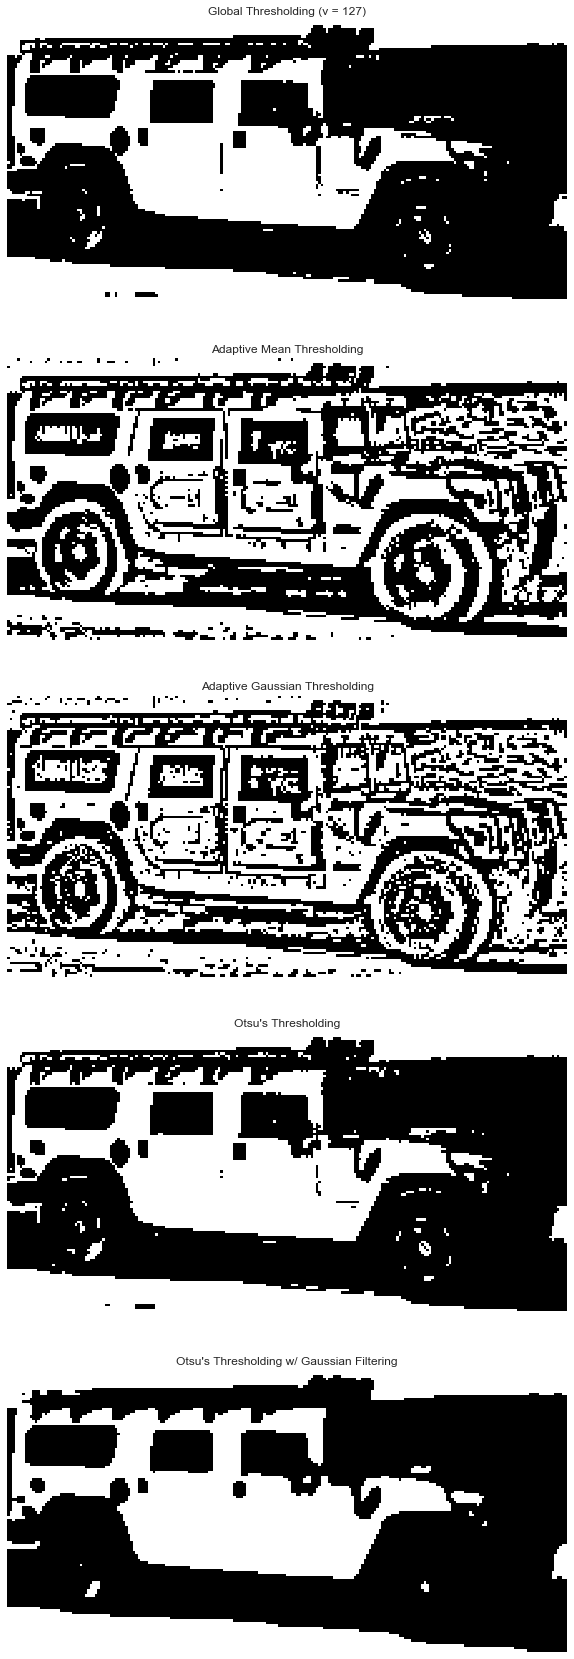

In [21]:
# comparison of 5 different thresholding methods
SC_sungil.compare_thresh(wo_yr_und_x_train[0])